<a href="https://colab.research.google.com/github/ayush2281/Pytorch-for-ML-DL-/blob/main/05_PyTorch_Going_Modular_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section answers the question, "how do I turn my notebook code into Python scripts?"

To do so, we're going to turn the most useful code cells in `notebook 04`. PyTorch Custom Datasets into a series of Python scripts saved to a directory called `going_modular.`

What is going modular?
Going modular involves turning notebook code (from a Jupyter Notebook or Google Colab notebook) into a series of different Python scripts that offer similar functionality.

For example, we could turn our notebook code from a series of cells into the following Python files:

* data_setup.py - a file to prepare and download data if needed.
* engine.py - a file containing various training functions.
* model_builder.py or model.py - a file to create a PyTorch model.
* train.py - a file to leverage all other files and train a target PyTorch model.
*utils.py - a file dedicated to helpful utility functions.

###Why would you want to go modular?
Notebooks are fantastic for iteratively exploring and running experiments quickly.

However, for larger scale projects you may find Python scripts more reproducible and easier to run.

Though this is a debated topic, as companies like Netflix have shown how they use notebooks for **production code.**

Production code is code that runs to offer a service to someone or something.

For example, if you have an app running online that other people can access and use, the code running that app is considered** production code.**

And libraries like fast.ai's `nb-dev` (short for notebook development) enable you to write whole Python libraries (including documentation) with Jupyter Notebooks.

Pros and cons of notebooks vs Python scripts

There's arguments for both sides.

But this list sums up a few of the main topics.

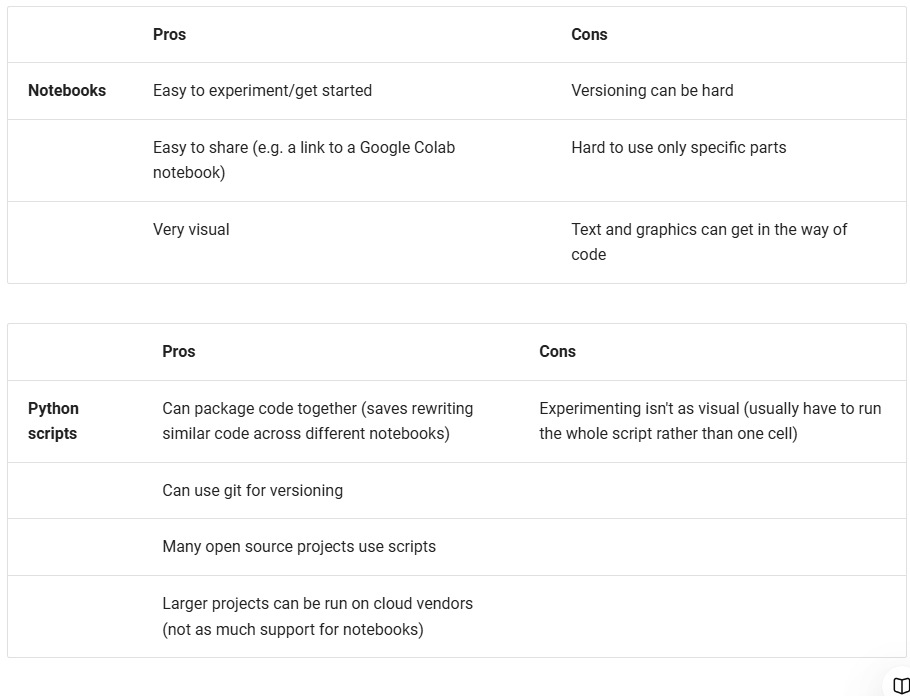

###PyTorch in the wild
In your travels, you'll see many code repositories for PyTorch-based ML projects have instructions on how to run the PyTorch code in the form of Python scripts.

For example, you might be instructed to run code like the following in a terminal/command line to train a model:

     `python train.py --model MODEL_NAME --batch_size BATCH_SIZE --lr LEARNING_RATE --num_epochs NUM_EPOCHS`


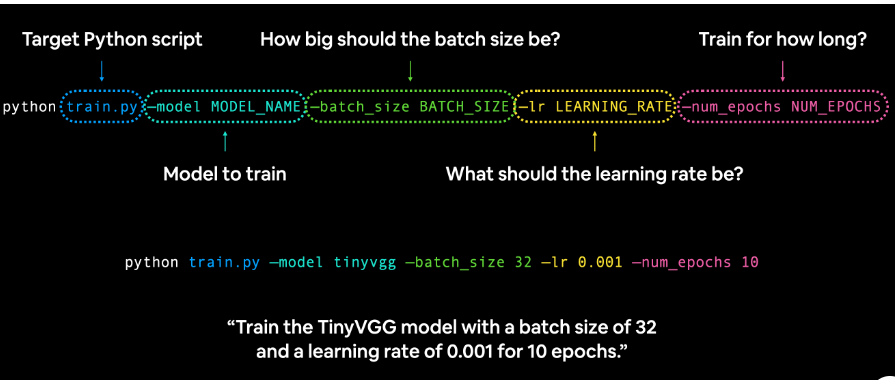

Running a PyTorch train.py script on the command line with various hyperparameter settings.

In this case, train.py is the target Python script, it'll likely contain functions to train a `PyTorch model.`

And `--model, --batch_size, --lr and --num_epochs` are known as argument flags.

You can set these to whatever values you like and if they're compatible with train.py, they'll work, if not, they'll error.

For example, let's say we wanted to train our TinyVGG model from notebook 04 for 10 epochs with a batch size of 32 and a learning rate of 0.001:

 `python train.py --model tinyvgg --batch_size 32 --lr 0.001 --num_epochs 10`
You could setup any number of these argument flags in your train.py script to suit your needs.

The PyTorch blog post for training state-of-the-art computer vision models uses this style.

this notebook is part 1/2 of section 05. Going Modular.

For reference, the two parts are:

1. 05. Going Modular: Part 1 (cell mode) - this notebook is run as a traditional Jupyter Notebook/Google Colab notebook and is a condensed version of notebook 04.
2. 05. Going Modular: Part 2 (script mode) - this notebook is the same as number 1 but with added functionality to turn each of the major sections into Python scripts, such as, `data_setup.py` and `train.py.`

Why two parts?

Because sometimes the best way to learn something is to see how it differs from something else.

If you run each notebook side-by-side you'll see how they differ and that's where the key learnings are

###What is cell mode?
A cell mode notebook is a regular notebook run exactly how we've been running them through the course.

Some cells contain text and others contain code.

### **What's the difference between this notebook (Part 1) and the script mode notebook (Part 2)**?
This notebook, 05. PyTorch Going Modular: Part 1 (cell mode), runs a cleaned up version of the most useful code from section 04. PyTorch Custom Datasets.

Running this notebook end-to-end will result in recreating the image classification model we built in notebook 04 (TinyVGG) trained on images of pizza, steak and sushi.

The main difference between this notebook (Part 1) and Part 2 is that each section in Part 2 (script mode) has an extra subsection (e.g. 2.1, 3.1, 4.1) for turning cell code into script code.

###0. Running a notebook in cell mode
As discussed, we're going to be running this notebook normally.

One cell at a time.

The code is from notebook 04, however, it has been condensed down to its core functionality.

1. Get data
We're going to start by downloading the same data we used in notebook 04, the pizza_steak_sushi dataset with images of pizza, steak and sushi.

**PART-1**

In [1]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [2]:
# setup traina nd testing path
train_dir = image_path / "train"
test_dir = image_path / "test"

In [3]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

###2. Create Datasets and DataLoaders

Now we'll turn the image dataset into PyTorch Dataset's and DataLoader's.

In [4]:
from torchvision import datasets, transforms

# Create simple transform
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [5]:
# get the class name in list
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [6]:
# can also gte class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [7]:
# check the length
len(train_data), len(test_data)

(225, 75)

In [8]:
# turn train and test dataset into dataloader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset= train_data,
                               batch_size= 1, # H0w many sample per batch --> 1 per batch
                               num_workers = 1, # how many subprocessor to use for data loading
                                shuffle = True)


test_dataloader = DataLoader(dataset= test_data,
                               batch_size= 1, # H0w many sample per batch --> 1 per batch
                               num_workers = 1, # how many subprocessor to use for data loading
                                shuffle = False) # # don't usually need to shuffle testing data


train_data, test_dataloader

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 <torch.utils.data.dataloader.DataLoader at 0x79e8a5d8b790>)

In [9]:
train_data, test_dataloader

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 <torch.utils.data.dataloader.DataLoader at 0x79e8a5d8b790>)

In [10]:
# check the single image shApe
img , label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


###3. Making a model (TinyVGG)

We're going to use the same model we used in notebook 04: TinyVGG from the CNN Explainer website.

The only change here from notebook 04 is that a docstring has been added using `Google's Style Guide for Python`.

In [11]:
import torch

from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
  See the original architecture here: https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=0), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x
      # return self.classifier(self.block_2(self.block_1(x))) # <- leverage the benefits of operator fusion

In [12]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate an instance of the model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(class_name)).to(device)
model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

To test our model let's do a single forward pass (pass a sample batch from the training set through our model).

**The forward pass is the fundamental process of feeding input data through a model to obtain an output or prediction.**

In [13]:
# 1. Get a batch of images and labels from the DataLoader
img_batch , label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single , label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label

print(f"Output Logits:\n{pred}\n")
print(f"Output prediction probabiilties:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output predicition label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label}")


Output Logits:
tensor([[ 0.0208, -0.0020,  0.0095]], device='cuda:0')

Output prediction probabiilties:
tensor([[0.3371, 0.3295, 0.3333]], device='cuda:0')

Output predicition label:
tensor([0], device='cuda:0')

Actual label:
tensor([1])


**##4. Creating train_step() and test_step() functions and train() to combine them**

Rather than writing them again, we can reuse the `train_step()` and `test_step()` functions from notebook 04.

The same goes for the `train()` function we created.

The only difference here is that these functions have had docstrings added to them in Google's Python Functions and Methods Style Guide.

Let's start by making `train_step()`.

In [14]:
from typing import Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

Now we'll do test_step().



In [15]:
from typing import Tuple
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

And we'll combine train_step() and test_step() into train().

In [16]:
from typing import Dict, List

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results

###5. Creating a function to save the model
Let's setup a function to save our model to a directory.



In [17]:
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """

  #create a traget directory
  target_dic_path = Path(target_dir)
  target_dic_path.mkdir(parents=True,
                        exist_ok= True)

  # Create model save path
  assert model_name.endwith(".pth") or model.name.endwith(".pt"), " model_name shoul end with .pt or .pth"
  model_save_path = targer_dir_path /model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f= model_save_path)

###6. Train, evaluate and save the model

Let's leverage the functions we've got above to train, test and save a model to file.



In [18]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)


# End the timer and print out how long it took
end_timer = timer()
print(f"[INFO] Total training time: {end_timer-start_time:.3f} seconds")

# SAVE THE MODEL
save_model(model= model_0,
           target_dir = "models",
           model_name ="05 _going_modular_cell_mode_tinyvgg_model.pth")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0923 | train_acc: 0.3911 | test_loss: 1.0726 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0265 | train_acc: 0.5111 | test_loss: 1.0164 | test_acc: 0.4267
Epoch: 3 | train_loss: 0.9601 | train_acc: 0.5200 | test_loss: 0.9913 | test_acc: 0.4667
Epoch: 4 | train_loss: 0.9158 | train_acc: 0.5778 | test_loss: 0.9784 | test_acc: 0.4400
Epoch: 5 | train_loss: 0.8913 | train_acc: 0.6000 | test_loss: 0.9814 | test_acc: 0.4800
[INFO] Total training time: 14.318 seconds


AttributeError: 'str' object has no attribute 'endwith'